# Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [3]:
df = pd.read_csv('hearing_test.csv')

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [10]:
# check if there is any missing value
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


In [12]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

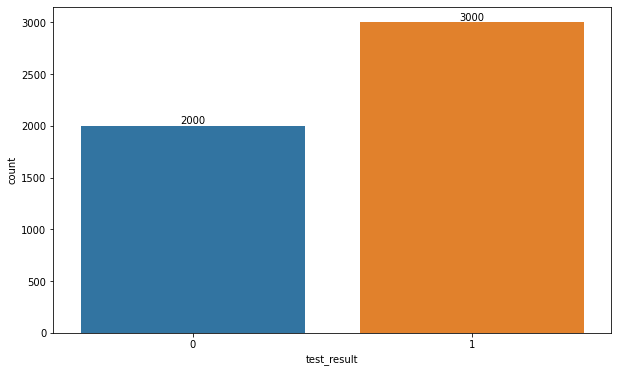

In [13]:
ax = sns.countplot(data=df, x=df['test_result'])
ax.bar_label(ax.containers[0]);

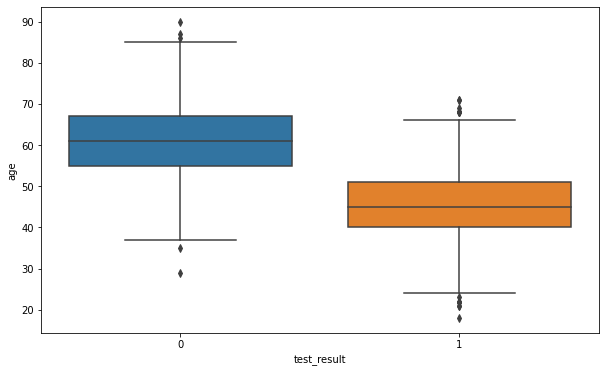

In [14]:
sns.boxplot(x='test_result',y='age',data=df);

# When we look at the box plots by age, we can say that the average age of those who passed the hearing test is around 45, 
# while the average age of those who did not pass is around 60. In short, we can say that the probability of passing the test increases for younger people.

<Axes: xlabel='test_result', ylabel='physical_score'>

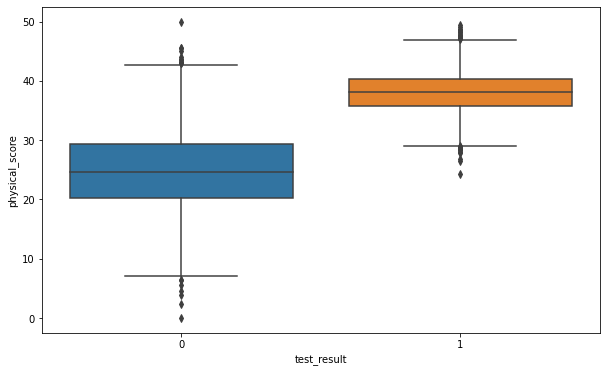

In [15]:
sns.boxplot(x='test_result',y='physical_score',data=df)

# When we look at the box plots by physical scores, we can say that the average physical score of those who passed the 
# hearing test is around 37, while the average physical score of those who did not pass is around 25. In short, 
# we can say that as the physical score increases, the probability of passing the test also increases.

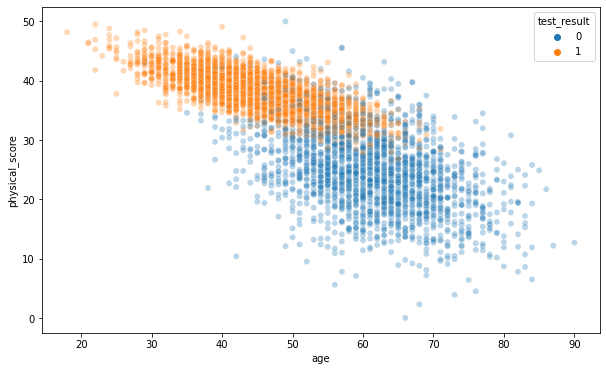

In [16]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.3);

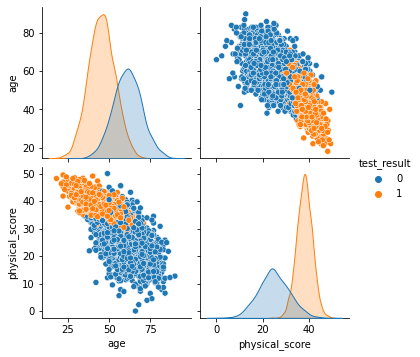

In [17]:
sns.pairplot(df,hue='test_result');

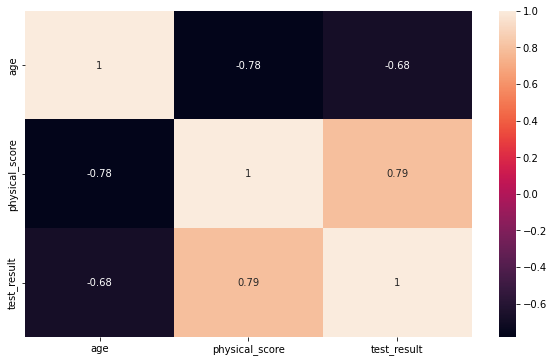

In [18]:
sns.heatmap(df.corr(), annot=True);

## Train | Test Split

In [19]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)  # 42 ?

In [22]:
#scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

## Modelling

In [23]:
from sklearn.linear_model import LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [24]:
# help(LogisticRegression)

In [25]:
log_model = LogisticRegression()

In [26]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [27]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

## Interpretation of coefficients

In [28]:
log_model.coef_

# we will see coefficient interpretation in the following steps

array([[-0.08365972,  0.43251827]])

In [29]:
log_model.intercept_

array([-9.35047287])

In [30]:
b2, b1 = log_model.coef_[0]
print("b2 (age coef)       :", b2)
print("b1 (physical_score) :", b1)

b2 (age coef)       : -0.0836597213408333
b1 (physical_score) : 0.4325182652459208


In [31]:
b0 = log_model.intercept_[0]
print("b0 (intercept) :", b0)

b0 (intercept) : -9.350472872727675


## Linear to Sigmoid Conversion

**The probability** that an event will occur is the possibility you expect to see that event in many trials. 

**Probabilities** always range between 0 and 1. 

**The odds** are defined as the probability that the event will occur divided by the probability that the event will not occur.

https://towardsdatascience.com/a-simple-interpretation-of-logistic-regression-coefficients-e3a40a62e8cf

In [26]:
def sigmoid(age, physical_score):

    log_odds = b2*age + b1*physical_score + b0 # b2*X2 + b1*X1 + b0
    probability = 1 / (1+np.exp(-log_odds))
    return probability

# Logistic regression converts the classic linear regression equation (b2X2 + b1X1 + b0) into 
# a probability using the function above.

### The probability and odds of passing the hearing test for age = 33, physical_score= 40

In [27]:
probability_age_33 = sigmoid(33, 40)
probability_age_33

# A person who is 33 years old and has a physical score of 40 has a probability of passing the hearing test of 99.45%.

0.9944560404714694

## Modeling with Scaling Data

In [46]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [47]:
pipe_model["logistic"].coef_

# We could have interpreted based on these coefficients, but in that case, our interpretations would have been 
# about the 1 stanz-score increase/decrease in age or physical score, and it would naturally have been 
# more difficult to understand.

array([[-0.94953524,  3.45991194]])

In [48]:
pipe_model["logistic"].intercept_

array([0.48867341])

In [49]:
#scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [50]:
#log_model = LogisticRegression()
#log_model.fit(X_train_scaled, y_train)

In [51]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [52]:
y_pred = pipe_model.predict(X_test)
y_pred

# predict estimates which test data belongs to which class.

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [53]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

# "predict_proba" shows the probability of test observations belonging to which class. 
# The first value represents the probability of belonging to class 0, while the second value represents 
# the probability of belonging to class 1. The observation is assigned to the class with the larger 
# probability value.

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

## X_test + y_yest + y_pred + y_pred_proba

In [54]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data


,age,physical_score,test_result
1718,39.0,37.8,1
2511,45.0,38.7,1
345,56.0,21.8,0
2521,40.0,44.0,1
54,64.0,25.4,0
...,...,...,...
4770,46.0,37.7,1
188,59.0,36.5,1
3335,54.0,22.8,0
4583,58.0,20.5,0


In [55]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

# We are adding the pred_proba column/feature to the test_data dataframe, which shows the probability of belonging to the class 1.

,age,physical_score,test_result,pred_proba
1718,39.0,37.8,1,0.976157
2511,45.0,38.7,1,0.973076
345,56.0,21.8,0,0.010806
2521,40.0,44.0,1,0.998092
54,64.0,25.4,0,0.024987
...,...,...,...,...
4770,46.0,37.7,1,0.955993
188,59.0,36.5,1,0.813195
3335,54.0,22.8,0,0.019392
4583,58.0,20.5,0,0.005285


In [56]:
test_data["pred"] = y_pred
test_data

#When making predictions with the model, probabilities greater than 0.5 are assigned to class 1, and 
# probabilities less than 0.5 are assigned to class 0. The model's predictions are added as a 
# feature named 'pred' to the test_data dataframe

,age,physical_score,test_result,pred_proba,pred
1718,39.0,37.8,1,0.976157,1
2511,45.0,38.7,1,0.973076,1
345,56.0,21.8,0,0.010806,0
2521,40.0,44.0,1,0.998092,1
54,64.0,25.4,0,0.024987,0
...,...,...,...,...,...
4770,46.0,37.7,1,0.955993,1
188,59.0,36.5,1,0.813195,1
3335,54.0,22.8,0,0.019392,0
4583,58.0,20.5,0,0.005285,0


## Model Performance on Classification Tasks

In [57]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [58]:
accuracy_score(y_test,y_pred)

0.93

In [59]:
pipe_model.score(X_test, y_test)

# when we give X_test and y_test as parameters to the score function, it returns the accuracy score.

0.93

In [60]:
precision_score(y_test, y_pred, pos_label=1)

# The precision_score function, by default, returns the precision score for class 1. It shows how many of 
# the correct predictions were made for predicting class 1. 
# A precision of 0.1 means that the model correctly predicted 10% of the predictions it made.

# for class 0, pos_label=0.

0.9331210191082803

In [61]:
recall_score(y_test, y_pred,  pos_label=1)

# By default, it returns the recall score of class 1. It shows how much of the class 1 the model can correctly detect
# A recall of 0.1 means the model can only detect 10% of class 1.

# for class 0, pos_label=0.

0.9543973941368078

In [62]:
f1_score(y_test,y_pred)

# The function returns the harmonic mean of precision and recall scores. There is always a trade-off between precision and recall scores.
# If precision increases/decreases, recall decreases/increases

0.9436392914653785

In [63]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay #plot_confusion_matrix


In [64]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]])

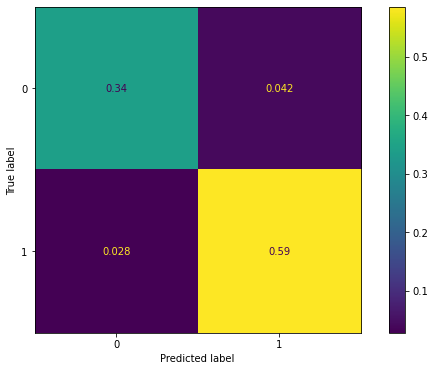

In [66]:
ConfusionMatrixDisplay.from_estimator(pipe_model,X_test, y_test,normalize='all')
#plot_confusion_matrix(pipe_model, X_test, y_test, normalize='all');

# Comparing to the previous display, it is more understandable since it contains labels.

# normalizing can be based on true, pred or all
# normalize="true"
# normalize="pred" 
# normalize="all"

In [67]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    

In [76]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# for the label 1
# precision = 0.93 means that among all positive predicitions, 93% of them are true.
# recall = 0.95 means that we detected 95% of actually positive classes.
# f1 score is an harmonic mean of precision and recall. You should interpret with recall and precision, not alone.

# Compare the train and test scores to see if the model is overfitting.

# But we will be sure about the overfitting after we implement cross-validation.

Test_Set
[[172  21]
 [ 14 293]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500


Train_Set
[[1567  240]
 [ 147 2546]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



## Cross Validate

In [77]:
from sklearn.model_selection import cross_validate

In [78]:
import sklearn
sklearn.metrics.SCORERS.keys()

# list of scores(metrics) which can be used in cross-validatoin and gridsearchcv. 
# we will select "accuracy", "precision", "recall" and "f1"

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [79]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))


# o determine definite overfitting/underfitting through cross-validation,
# we set return_train_score=True in each iteration to compare the train and validation set scores.

# If we have applied scaling to our data, we do not forget to use pipeline in CV and gridsearch processes to prevent data leakage.

# The scores returned below are always for class 1. We need to perform additional operations for the CV scores of class 0 metrics. 
# An example will be shown in the next lesson.

In [80]:
df_scores.mean()[2:]

# now, we can be sure about overfitting/underfitting with these results. -> No overfitting and underfitting

test_accuracy      0.914667
train_accuracy     0.914000
test_precision     0.914709
train_precision    0.913790
test_recall        0.946138
train_recall       0.945496
test_f1            0.929875
train_f1           0.929373
dtype: float64

In [81]:
eval_metric(model, X_train, y_train, X_test, y_test)

# These are the final results
# We can report these results to customer, stakeholders etc.
# We can compare the reliability and consistency of these results by comparing validation scores of CV. 
# If they are close, then we can conclude that these are consistent.

Test_Set
[[172  21]
 [ 14 293]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500


Train_Set
[[1567  240]
 [ 147 2546]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

Purpose of ROC Curve:

    1. Analysing the strength/predictive power of a classifier.
    
    2. Determining optimal threshold.
    
    3. Comparing two models (using Area Under the Curve).

AUC represents a degree or measure of separability. It tells us how much the model is capable of distinguishing between classes.

The ROC Curve was first used during World War II for the analysis of radar signals. After the attack on Pearl Harbor, the US army began new research to improve the rate of detection of Japanese aircraft from their radar signals. Needless to say, they did not want to miss any of them. Neither did they wish to waste their resources on false alarms. They measured the ability of a radar receiver operator to make these predictions called the Receiver Operating Characteristic. That is the origin of the name. The purpose of the curve was similar to how we use it to improve our machine learning models now. The aim was to analyse the predictive power of the predictor in ensuring the detection of as many true positives as possible while minimizing false positives.

https://towardsdatascience.com/demystifying-roc-curves-df809474529a

## ROC AUC Curve

![ROC.gif](attachment:ROC.gif)

## ROC AUC and Precision Recall Curve

![PR.gif](attachment:PR.gif)

## For Imbalanced Data ROC AUC and Precsion-Recall Curve

![imbalance.gif](attachment:imbalance.gif)

In [55]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, RocCurveDisplay, PrecisionRecallDisplay
#plot_roc_curve, plot_precision_recall_curve

# in classification problems, we can observe ROC-AUC score when data set is balanced,
# average precision score when unbalanced.

# AUC will produce too optimistic(misleading) scores with unbalanaced data set.

# These scores indicate the general performance of the model and how the model is successful at distinguishing the target class from others.


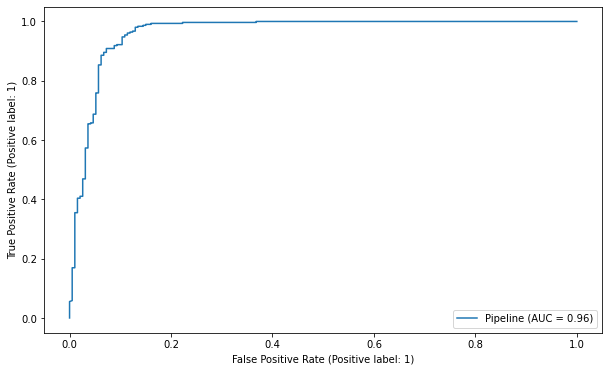

In [56]:
#plot_roc_curve(pipe_model, X_test, y_test);
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test)

# since the data is balanced, we are observing AUC. AUC = 0.96 ==> the model can distinguish class 1 from class 0 with a 96% success.

In [57]:
roc_auc_score(y_test, y_pred_proba[:,1])

# for AUC score, give probabilities of class 1 with y_test to roc_auc_score function.

0.9630132824762451

In [58]:
roc_auc_score(y_test, y_pred)

# don't give y_pred! use y_pred_proba!

0.9227945519906837

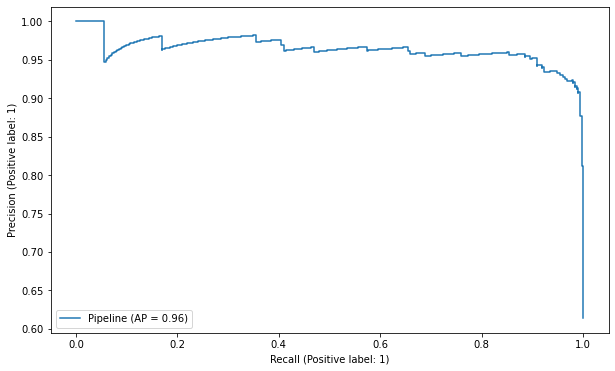

In [59]:
#plot_precision_recall_curve(pipe_model, X_test, y_test);
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test)

# for balanced datasets, both AUC score and average precision score con return similar values, but
# it's better to consider AUC for balanced dataset
# and average precision for unbalanced one when negative dominates 

## Final Model and Model Deployment without Pipeline

In [60]:
scaler = StandardScaler().fit(X)

In [61]:
import pickle
pickle.dump(scaler, open("scaler_hearing", 'wb'))

In [62]:
X_scaled = scaler.transform(X)

In [63]:
final_model = LogisticRegression().fit(X_scaled, y)

In [64]:
pickle.dump(final_model, open("final_model_hearing", 'wb'))

In [65]:
my_dict = {"age": [20, 30, 40, 50, 60],
           "physical_score": [50, 30, 20, 10, 5]}

In [66]:
sample = pd.DataFrame(my_dict)
sample

,age,physical_score
0,20,50
1,30,30
2,40,20
3,50,10
4,60,5


In [67]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [68]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [69]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [70]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [71]:
predictions

array([1, 1, 0, 0, 0])

In [72]:
predictions_proba[:,1]

array([9.99970203e-01, 7.30358070e-01, 1.61805230e-02, 9.98533190e-05,
       5.25930939e-06])

## Final Model and Model Deployment with Pipeline

In [73]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [74]:
import pickle
pickle.dump(final_model, open("final_pipe_model", 'wb'))
# wb, rb are modes
# wb: write binary
# rb: read binary
# instead of w and r, we should use wb and rb to serialize and de-serialize the ML model pickle

In [75]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [76]:
new_model.predict(sample)

array([1, 1, 0, 0, 0])

In [77]:
new_model.predict_proba(sample)[:,1]

array([9.99970203e-01, 7.30358070e-01, 1.61805230e-02, 9.98533190e-05,
       5.25930939e-06])

In [78]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,age,physical_score,pred,pred_proba
0,20,50,1,0.999970
1,30,30,1,0.730358
2,40,20,0,0.016181
3,50,10,0,0.000100
4,60,5,0,0.000005
